# HOUSING DATA REGRESSION MODEL.

* ####  Author: Brian Kipruto Ngeny. 
* ####  Student pace: Full time
* ####  Scheduled project review date/time: 09/07/2023 23:59:59
* ####  Instructor name: Veronica Isiaho
* ####  Blog post URL: 


***

## 1. Business Understanding.
> ### Introduction.
Housing projects consist of several different factors that determine the quality of the final product which is a house. Housing project can be managed by a real estate agency which is a business that arranges the selling, renting, or management of homes, land, and buildings for their owners. A real estate agency is a key player in the housing market, attracting both local and international investors who seek to capitalize on the lucrative opportunities presented by real property. With the advent of technology and availability of vast amounts of data, investors are increasingly turning to quantitative ananlysis and machine learning techniques to determine the factors that affect the sale price of houses in the real estate industry.

> This project aims to determine the specific factors that increase or decrease the sale price of a housing unit by using a range of specific factors within the data provided. The target partners include; real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy. By determining the factors that affect the sale price of a house, I hope to provide them with valuable insights that can inform their investment decisions and enable them to optimize their investment returns. 

> ### Problem statement
Historical housing data exists in enormous quantities, but it is mostly comprised of reports compiled after the house has been sold. This makes it hard to deduce the specific factors that affected the sale price of the houses. Determining which factors have the most significant effect on the final selling price of a house is crucial in making informed decissions about whether to invest in specific aspects such as renovations, expansions or even the housing unit as a whole.

> To address this issue, I aim to use statistical ananlysis to identify the specific factors that affect the sale price of a house. By doing so, I hope to provide an accurate linear regression model that helps real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy make informed decissions. This research will lead to a better understanding of the housing industry and increase returns on investments.

> ### Objectives
My aim is to:
> * Perform a statistical analysis of the data provided to determine the specific factors that affect the final selling price of a house.
> * Formulate an accurate linear regression model that helps stakeholders make informed decissions before investing in houses.
> * Provide recommendations based on the regression model.


## Data Understanding

#### I) Importing libraries and loading data.

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# check the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### II) Data description.
The King County dataset contains 21597 rows and 21 columns with the following information:

|No.| Column    | Description|
|---| ---       | ---         |
|1|id|Unique identifier for a house|
|2|date|Date the house was sold|
|3|price|sale price of the house|
|4|bedrooms|number of bedrooms|
|5|bathrooms|number of bathrooms|
|6|sqft_living|square feet of the living area|
|7|sqft_lot|square feet of the lot|
|8|floors|number of floors|
|9|waterfront|whether the house is on a waterfront|
|10|view|view from the house|
|11|condition|general condition of the house|
|12|grade|overall grade of the house|
|13|sqft_above|square feet of the house above the basement|
|14|sqft_basement|square feet of the basement|
|15|yr_buit|the year it was built|
|16|yr_renovated|the year it was renovated|
|17|zipcode|area zipcode|
|18|lat|latitude coordinates|
|19|long|longitude coordinates|
|20|sqft_living15|square feet of the living area for 15 neighbouring houses|
|21|sqft_lot15|square feet of the land lots for 15 neighbouring houses|

Out of the 21 columns of the dataset, only 15 columns are useful to the process. The columns that will be dropped are date, zipcode, lat, long, sqft_living 15, sqft_lot15 and they have been dropped because most of them are the same through out the entire dataset while others have no bearing on the sale price of the house.  

### Data cleaning
The next step is to clean the data by going through the following steps, so as to come up with a useful data set that can then be used in the modelling process of the prediction model. The data cleaning steps are;
* Normalize the useful columns.
* Drop the columns we don't need.
* Identify any missing values and drop the rows. This is the best solution for dealing with missing values because the rows with missing values are few and are not likely to affect the outcome of the model. 
* Engineer features or new columns where necessary.

In [12]:
# drop the columns we do not need
df = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


## Data Preparation

> ### Hypothesis testing

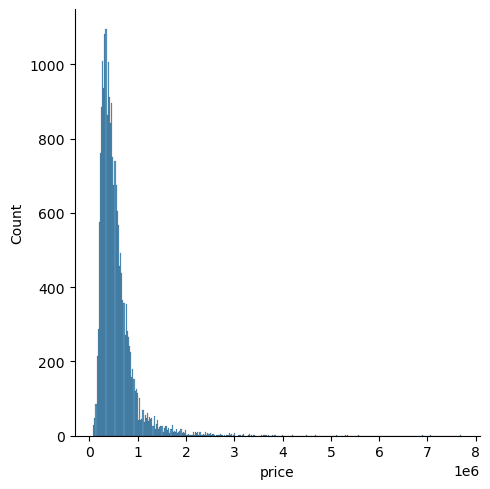

In [16]:
sns.displot(data['price'])

In [17]:
print('Skewness:', skew(data['price']))
print('Kurtosis:', kurtosis(data['price']))

Skewness: 4.023085207745834
Kurtosis: 34.53308449607733


In [8]:
# create a simple regression model
simple_formula = 'price ~ condition'
simple_model = ols(simple_formula, df).fit()
simple_model_summary = simple_model.summary()
# YOUR CODE HERE
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.86
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           9.12e-31
Time:                        22:06:38   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21592   BIC:                         6.147e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.422e+05   3092.358    175.327      0.000    5.36e+05    5.48e+05
condition[T.Fair]       -2.14e+05   2.83e+04     -7.574      0.000   -2.69e+05   -1.59e+05
condition[T.Good]       -2.08e+04   5760.105     -3.611      0.000   -3.21e+04   -9508.375
condition[T.Poor]      -2.011e+05   6.81e+04     -2.955      0.003   -3.35e+05   -6.77e+04
condition[T.Very Good]   7.04e+04   9401.080      7.489      0.000     5.2e+04    8.88e+04
==============================================================================
Omnibus:                    19184.771   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1160794.218
Skew:                           4.043   Prob(JB):                         0.00
Kurtosis:                      37.994   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""